# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose.

In [298]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

In [299]:
url = "https://raw.githubusercontent.com/ikhwankusuma/W12_DM_ikhwan/main/healthcare_dataset.csv.crdownload"

df = pd.read_csv(url)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146.0,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404.0,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292.0,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480.0,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477.0,Urgent,2021-08-02,Paracetamol,Normal


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                8778 non-null   object 
 1   Age                 8778 non-null   int64  
 2   Gender              8778 non-null   object 
 3   Blood Type          8778 non-null   object 
 4   Medical Condition   8778 non-null   object 
 5   Date of Admission   8778 non-null   object 
 6   Doctor              8778 non-null   object 
 7   Hospital            8778 non-null   object 
 8   Insurance Provider  8778 non-null   object 
 9   Billing Amount      8777 non-null   float64
 10  Room Number         8777 non-null   float64
 11  Admission Type      8777 non-null   object 
 12  Discharge Date      8777 non-null   object 
 13  Medication          8777 non-null   object 
 14  Test Results        8777 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.0+ 

In [301]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [302]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8777 entries, 0 to 8776
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                8777 non-null   object 
 1   Age                 8777 non-null   int64  
 2   Gender              8777 non-null   object 
 3   Blood Type          8777 non-null   object 
 4   Medical Condition   8777 non-null   object 
 5   Date of Admission   8777 non-null   object 
 6   Doctor              8777 non-null   object 
 7   Hospital            8777 non-null   object 
 8   Insurance Provider  8777 non-null   object 
 9   Billing Amount      8777 non-null   float64
 10  Room Number         8777 non-null   float64
 11  Admission Type      8777 non-null   object 
 12  Discharge Date      8777 non-null   object 
 13  Medication          8777 non-null   object 
 14  Test Results        8777 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ 

In [303]:
print(df["Medical Condition"].isnull().values.any())
print(df["Admission Type"].isnull().values.any())
print(df["Insurance Provider"].isnull().values.any())
print(df["Blood Type"].isnull().values.any())

False
False
False
False


In [304]:
print("Available Medical Conditions: ", df["Medical Condition"].unique())
print("Available Admission Types: ", df["Admission Type"].unique())
print("Available Insurance Providers: ", df["Insurance Provider"].unique())
print("Available Blood Types: ", df["Blood Type"].unique())

Available Medical Conditions:  ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Available Admission Types:  ['Elective' 'Emergency' 'Urgent']
Available Insurance Providers:  ['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
Available Blood Types:  ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']


<Axes: ylabel='Medical Condition'>

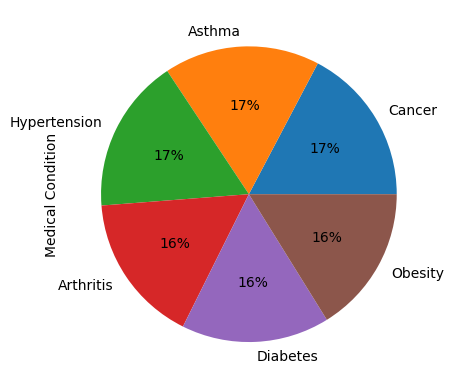

In [305]:
df["Medical Condition"].value_counts().plot(kind = "pie", autopct = "%1.0f%%")

<Axes: ylabel='Admission Type'>

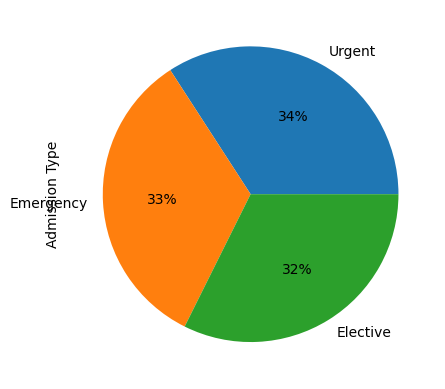

In [306]:
df["Admission Type"].value_counts().plot(kind = "pie", autopct = "%1.0f%%")

<Axes: ylabel='Insurance Provider'>

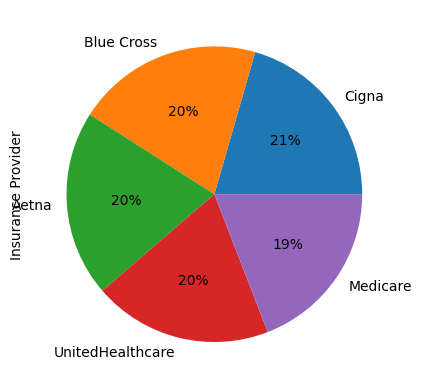

In [307]:
df["Insurance Provider"].value_counts().plot(kind = "pie", autopct = "%1.0f%%")

<Axes: ylabel='Blood Type'>

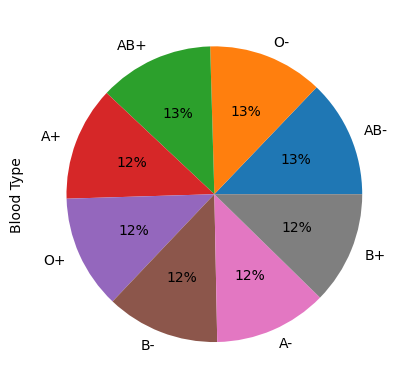

In [308]:
df["Blood Type"].value_counts().plot(kind = "pie", autopct = "%1.0f%%")

In [309]:
df["Medical Condition"].replace(["Diabetes", "Asthma", "Obesity", "Arthritis", "Hypertension", "Cancer"], [0, 1, 2, 3, 4, 5], inplace = True)
df["Admission Type"].replace(["Elective", "Emergency", "Urgent"], [0, 1, 2], inplace = True)
df["Insurance Provider"].replace(["Medicare", "UnitedHealthcare", "Aetna", "Cigna", "Blue Cross"], [0, 1, 2, 3, 4], inplace = True)
df["Gender"].replace(["Female", "Male"], [0, 1], inplace = True)
df["Blood Type"].replace(["O-", "O+", "B-", "AB+", "A+", "AB-", "A-", "B+"], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)

df.drop(["Room Number", "Hospital", "Doctor", "Name", "Date of Admission", "Discharge Date"], axis = 1, inplace = True)

# Regression untuk menentukan biaya pengobatan (Billing Amount)

In [310]:
rdf = df.copy()
rdf.drop(['Medication', 'Test Results'], axis = 1, inplace = True)

rdf.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type
0,81,0,0,0,0,37490.983364,0
1,35,1,1,1,1,47304.064845,1
2,61,1,2,2,0,36874.896997,1
3,49,1,2,1,0,23303.322092,2
4,51,1,0,3,1,18086.344184,2


In [311]:
pr = PolynomialFeatures(2)

X = rdf.loc[:, ["Age", "Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type"]]
y = rdf.loc[:, ["Billing Amount"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 Score: {}'.format(r2_score(y_test, y_pred)))

RMSE Score: 14404.934094630744
R2 Score: -0.000978004740957994


In [312]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_regressor = LinearRegression()

poly_regressor.fit(X_train_poly, y_train)

y_test_predict = poly_regressor.predict(X_test_poly)

print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_predict))))
print('R2 Score: {}'.format(r2_score(y_test, y_test_predict)))

RMSE Score: 14407.640768243147
R2 Score: -0.0013542057389830386


# Classification untuk penentuan obat (Medication)

In [313]:
cdf = df.copy()

cdf.drop(['Billing Amount', 'Test Results'], axis = 1, inplace = True)
cdf.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication
0,81,0,0,0,0,0,Aspirin
1,35,1,1,1,1,1,Lipitor
2,61,1,2,2,0,1,Lipitor
3,49,1,2,1,0,2,Penicillin
4,51,1,0,3,1,2,Paracetamol


In [314]:
X = cdf.loc[:, ["Age", "Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type"]]
y = cdf.loc[:, ["Medication"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.20159453302961275
Precision: 0.1967029359381771
Recall: 0.20137290552652995
